### Importing DataSets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

train = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/train.csv')
cmpng = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/campaign_data.csv')
item = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/item_data.csv')
customer_dmogrph = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/customer_demographics.csv')
coupon_item = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/coupon_item_mapping.csv')
customer_tran = pd.read_csv('/Users/arijitchandra/Downloads/train_AmEx/customer_transaction_data.csv')
test = pd.read_csv('/Users/arijitchandra/Downloads/Test_AmEx/test_AmEx.csv')
sub = pd.read_csv('/Users/arijitchandra/Downloads/sample_sub_AmEx.csv')

### Shape of DataSets

In [2]:
train.shape,cmpng.shape,item.shape,customer_dmogrph.shape,coupon_item.shape,customer_tran.shape

((78369, 5), (28, 4), (74066, 4), (760, 7), (92663, 2), (1324566, 7))

In [3]:
test.shape,sub.shape

((50226, 4), (50226, 2))

### Finding DataSets with NaN values 

In [4]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size))
print("Total Features with NaN Values in Campaign = " + str(cmpng.columns[cmpng.isnull().sum() != 0].size))
print("Total Features with NaN Values in item = " + str(item.columns[item.isnull().sum() != 0].size))
print("Total Features with NaN Values in Customer demography = " + str(customer_dmogrph.columns[customer_dmogrph.isnull().sum() != 0].size))
print("Total Features with NaN Values in coupon item relation = " + str(coupon_item.columns[coupon_item.isnull().sum() != 0].size))
print("Total Features with NaN Values in customer transaction = " + str(customer_tran.columns[customer_tran.isnull().sum() != 0].size))
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))
print("Total Features with NaN Values in Sample sub = " + str(sub.columns[sub.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in Campaign = 0
Total Features with NaN Values in item = 0
Total Features with NaN Values in Customer demography = 2
Total Features with NaN Values in coupon item relation = 0
Total Features with NaN Values in customer transaction = 0
Total Features with NaN Values in test = 0
Total Features with NaN Values in Sample sub = 0


### Columns with NaN value

In [5]:
customer_dmogrph.columns[customer_dmogrph.isna().any()].to_list()

['marital_status', 'no_of_children']

### Number of rows with NaN value

In [6]:
len(customer_dmogrph)-customer_dmogrph.count()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

### Percentage of NaN values in each column

In [7]:
customer_dmogrph.isna().mean().round(4) * 100

customer_id        0.00
age_range          0.00
marital_status    43.29
rented             0.00
family_size        0.00
no_of_children    70.79
income_bracket     0.00
dtype: float64

Close look at Customer demograghic dataset

In [8]:
customer_dmogrph.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [9]:
customer_dmogrph.head(20)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


### Replacing NaN with 0 and then converting it to integer value for performing feature engineering

In [10]:
customer_dmogrph['no_of_children'].fillna(0, inplace=True)

In [11]:
customer_dmogrph['no_of_children'].replace('3+','3',inplace=True)

In [12]:
customer_dmogrph['family_size'].replace('5+', 5,inplace=True)

In [13]:
customer_dmogrph['marital_status']=customer_dmogrph['family_size'].astype(int)-customer_dmogrph['no_of_children'].astype(int)

### Checking NaN values in operated DataSet

In [14]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size))
print("Total Features with NaN Values in Campaign = " + str(cmpng.columns[cmpng.isnull().sum() != 0].size))
print("Total Features with NaN Values in item = " + str(item.columns[item.isnull().sum() != 0].size))
print("Total Features with NaN Values in Customer demography = " + str(customer_dmogrph.columns[customer_dmogrph.isnull().sum() != 0].size))
print("Total Features with NaN Values in coupon item relation = " + str(coupon_item.columns[coupon_item.isnull().sum() != 0].size))
print("Total Features with NaN Values in customer transaction = " + str(customer_tran.columns[customer_tran.isnull().sum() != 0].size))
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))
print("Total Features with NaN Values in Sample sub = " + str(sub.columns[sub.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in Campaign = 0
Total Features with NaN Values in item = 0
Total Features with NaN Values in Customer demography = 0
Total Features with NaN Values in coupon item relation = 0
Total Features with NaN Values in customer transaction = 0
Total Features with NaN Values in test = 0
Total Features with NaN Values in Sample sub = 0


### Close look at the DataSet Description

In [15]:
train.describe()### Since mean is almost equals to median so no distribution seems to be normal. 
                ### and no modification is required

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [16]:
cmpng.describe()### Since mean is almost equals to median so no distribution seems to be normal. 
                ### and no modification is required

,campaign_id
count,28.000000
mean,15.571429
std,9.118271
min,1.000000
25%,7.750000
50%,16.500000
75%,23.250000
max,30.000000


In [17]:
item.describe()### Brand value needs to be checked in deapth as there is deviation between mean and mode

,item_id,brand
count,74066.000000,74066.000000
mean,37033.500000,1485.560055
std,21381.156856,1537.385673
min,1.000000,1.000000
25%,18517.250000,278.000000
50%,37033.500000,978.000000
75%,55549.750000,2013.000000
max,74066.000000,5528.000000


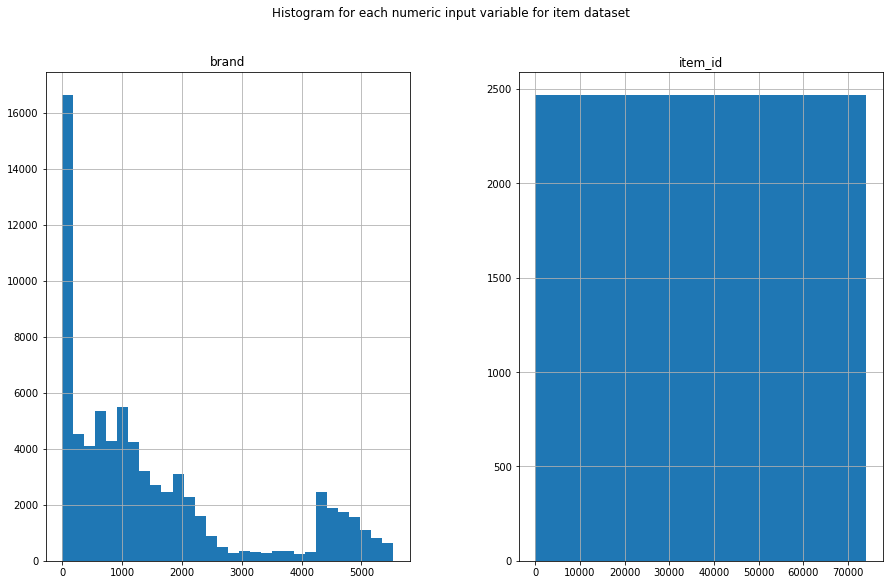

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
item.hist(bins=30, figsize=(15,9),layout=(1,2))
pl.suptitle("Histogram for each numeric input variable for item dataset")
plt.show()

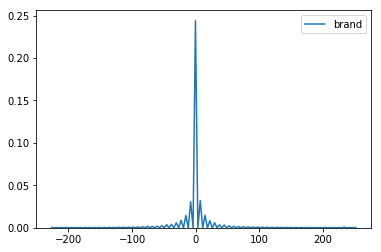

In [19]:
sns.kdeplot(np.tan(item.brand)) ### Non-linear transformation
plt.show()

In [20]:
np.tan(item.brand).isna().sum()

0

In [21]:
item.brand=np.tan(item.brand)

In [22]:
train.campaign_id.nunique(),cmpng.campaign_id.nunique()

(18, 28)

In [23]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [24]:
cmpng.head(50)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [25]:
train = pd.merge(train, cmpng, on='campaign_id', how='left')
test = pd.merge(test, cmpng, on='campaign_id', how='left')
train.shape,test.shape

((78369, 8), (50226, 7))

In [26]:
cust_tran_demograph = pd.merge(customer_tran,customer_dmogrph, on='customer_id', how='left')
cust_tran_demograph.shape

(1324566, 13)

In [27]:
cust_tran_demograph.isna().mean().round(4) *100

date                0.00
customer_id         0.00
item_id             0.00
quantity            0.00
selling_price       0.00
other_discount      0.00
coupon_discount     0.00
age_range          40.24
marital_status     40.24
rented             40.24
family_size        40.24
no_of_children     40.24
income_bracket     40.24
dtype: float64

In [28]:
coupon_item = pd.merge(coupon_item,item, on = 'item_id', how = 'left')
coupon_item.shape

(92663, 5)

In [29]:
coupon_item.isna().mean().round(4) *100

coupon_id     0.0
item_id       0.0
brand         0.0
brand_type    0.0
category      0.0
dtype: float64

In [30]:
cust_all_dtls= pd.merge(cust_tran_demograph,coupon_item, on='item_id', how='left')
cust_all_dtls.shape

(2657495, 17)

In [31]:
cust_all_dtls.isna().mean().round(4) *100

date                0.00
customer_id         0.00
item_id             0.00
quantity            0.00
selling_price       0.00
other_discount      0.00
coupon_discount     0.00
age_range          40.01
marital_status     40.01
rented             40.01
family_size        40.01
no_of_children     40.01
income_bracket     40.01
coupon_id          20.93
brand              20.93
brand_type         20.93
category           20.93
dtype: float64

In [32]:
train.isna().mean().round(4) * 100

id                   0.0
campaign_id          0.0
coupon_id            0.0
customer_id          0.0
redemption_status    0.0
campaign_type        0.0
start_date           0.0
end_date             0.0
dtype: float64

In [33]:
cust_all_dtls

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-0.611274,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-0.611274,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,-0.611274,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-0.611274,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-0.611274,Local,Natural Products
5,2012-01-02,1501,54253,1,53.43,-13.89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,-0.611274,Local,Natural Products
6,2012-01-02,1501,31962,1,106.50,-14.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,625.0,-0.753870,Established,Grocery
7,2012-01-02,1501,33647,1,67.32,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012-01-02,1501,48199,1,71.24,-28.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,625.0,-0.753870,Established,Grocery
9,2012-01-02,1501,48199,1,71.24,-28.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,624.0,-0.753870,Established,Grocery


In [34]:
cust_all_dtls.marital_status.fillna(cust_all_dtls.marital_status.median(),  inplace=True)
cust_all_dtls.rented.fillna(cust_all_dtls.rented.median(), inplace=True)
cust_all_dtls.family_size.fillna(cust_all_dtls.family_size.median(), inplace=True)
cust_all_dtls.no_of_children.fillna(cust_all_dtls.no_of_children.median(), inplace=True)
cust_all_dtls.income_bracket.fillna(cust_all_dtls.income_bracket.median(), inplace=True)
cust_all_dtls.coupon_id.fillna(cust_all_dtls.coupon_id.median(), inplace=True)
cust_all_dtls.brand.fillna(cust_all_dtls.brand.mean(), inplace=True)
cust_all_dtls.age_range.fillna(cust_all_dtls.age_range.mode()[0], inplace=True)
cust_all_dtls.brand_type.fillna(cust_all_dtls.brand_type.mode()[0],inplace=True)
cust_all_dtls.category.fillna(cust_all_dtls.category.mode()[0], inplace=True)

In [35]:
cust_all_dtls.isna().mean().round(4) *100

date               0.0
customer_id        0.0
item_id            0.0
quantity           0.0
selling_price      0.0
other_discount     0.0
coupon_discount    0.0
age_range          0.0
marital_status     0.0
rented             0.0
family_size        0.0
no_of_children     0.0
income_bracket     0.0
coupon_id          0.0
brand              0.0
brand_type         0.0
category           0.0
dtype: float64

In [36]:
print(set(train.customer_id)-set(cust_all_dtls.customer_id))
print(set(test.customer_id)-set(cust_all_dtls.customer_id))

set()
set()


In [37]:
cust_all_dtls.dtypes

date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_discount    float64
age_range           object
marital_status     float64
rented             float64
family_size         object
no_of_children      object
income_bracket     float64
coupon_id          float64
brand              float64
brand_type          object
category            object
dtype: object

In [38]:
%%time
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(cust_all_dtls['age_range'].astype(str))
cust_all_dtls['age_range']=le.transform(cust_all_dtls['age_range'].astype(str))

le.fit(cust_all_dtls['family_size'].astype(str))
cust_all_dtls['family_size']=le.transform(cust_all_dtls['family_size'].astype(str))

le.fit(cust_all_dtls['no_of_children'].astype(str))
cust_all_dtls['no_of_children']=le.transform(cust_all_dtls['no_of_children'].astype(str))

le.fit(cust_all_dtls['brand_type'].astype(str))
cust_all_dtls['brand_type']=le.transform(cust_all_dtls['brand_type'].astype(str))

le.fit(cust_all_dtls['category'].astype(str))
cust_all_dtls['category']=le.transform(cust_all_dtls['category'].astype(str))

CPU times: user 23 s, sys: 367 ms, total: 23.4 s
Wall time: 23.4 s


In [39]:
%%time
from datetime import datetime
cust_all_dtls['date']=[datetime.strptime(cust_all_dtls.date[i],'%Y-%m-%d') for i in range(len(cust_all_dtls))]

CPU times: user 2min 10s, sys: 180 ms, total: 2min 10s
Wall time: 2min 10s


In [40]:
def data_engineering(actual):
    new = pd.DataFrame()
    
    def f1(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    def f2(x):
        return np.mean(np.abs(np.diff(x)))
    
    for col in actual.columns:
        if col in ['date', 'customer_id', 'item_id', 'coupon_id']:
            continue
        new[col + '_mean'] = actual.groupby(['customer_id'])[col].mean()
        new[col + '_min'] = actual.groupby(['customer_id'])[col].min()
        new[col + '_max'] = actual.groupby(['customer_id'])[col].max()
        new[col + '_std'] = actual.groupby(['customer_id'])[col].std()
        
        ## Change. 1st order.
        #new[col + '_mean_abs_change'] = actual.groupby('customer_id')[col].apply(f2)
        #
        ## Change of Change. 2nd order.
        #new[col + '_mean_change_of_abs_change'] = actual.groupby('customer_id')[col].apply(f1)
        #
        #new[col + '_abs_max'] = actual.groupby('customer_id')[col].apply(lambda x: np.max(np.abs(x)))
        #new[col + '_abs_min'] = actual.groupby('customer_id')[col].apply(lambda x: np.min(np.abs(x)))
        
    for col in actual.columns:
        if col in ['date', 'item_id', 'coupon_id']:
            new[col + '_qtylo'] = actual.groupby(['customer_id'])[col].quantile(.05)
            new[col + '_qtyhi'] = actual.groupby(['customer_id'])[col].quantile(.95)
            new[col + '_qtymid'] = actual.groupby(['customer_id'])[col].quantile(.50)
            new[col + '_min'] = actual.groupby(['customer_id'])[col].min()
            new[col + '_max'] = actual.groupby(['customer_id'])[col].max()
            new[col + '_count'] = actual.groupby('customer_id')[col].count()
            new[col + '_unique'] = actual.groupby('customer_id')[col].nunique()
            new[col + '_count_to_unq'] = new[col + '_count'] / new[col + '_unique']
            
            
    return new

In [41]:
%%time
cust_dtls_engg = data_engineering(cust_all_dtls)

CPU times: user 21.2 s, sys: 654 ms, total: 21.9 s
Wall time: 21.9 s


In [42]:
cust_dtls_engg.shape

(1582, 76)

In [43]:
train_df =pd.merge(train, cust_dtls_engg, on='customer_id', how='left')
test_df =pd.merge(test, cust_dtls_engg, on='customer_id', how='left')
train_df.shape,test_df.shape

((78369, 84), (50226, 83))

In [44]:
train_df.dtypes

id                                 int64
campaign_id                        int64
coupon_id                          int64
customer_id                        int64
redemption_status                  int64
campaign_type                     object
start_date                        object
end_date                          object
quantity_mean                    float64
quantity_min                       int64
quantity_max                       int64
quantity_std                     float64
selling_price_mean               float64
selling_price_min                float64
selling_price_max                float64
selling_price_std                float64
other_discount_mean              float64
other_discount_min               float64
other_discount_max               float64
other_discount_std               float64
coupon_discount_mean             float64
coupon_discount_min              float64
coupon_discount_max              float64
coupon_discount_std              float64
age_range_mean  

In [45]:
%%time
from datetime import datetime
train_df['start_date']=[datetime.strptime(train_df['start_date'][i],'%d/%m/%y') for i in range(len(train_df))]
train_df['end_date']=[datetime.strptime(train_df['end_date'][i],'%d/%m/%y') for i in range(len(train_df))]
test_df['start_date']=[datetime.strptime(test_df['start_date'][i],'%d/%m/%y') for i in range(len(test_df))]
test_df['end_date']=[datetime.strptime(test_df['end_date'][i],'%d/%m/%y') for i in range(len(test_df))]

CPU times: user 7.55 s, sys: 19 ms, total: 7.56 s
Wall time: 7.56 s


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(train_df['campaign_type'].astype(str))
train_df['campaign_type']=le.transform(train_df['campaign_type'].astype(str))

le.fit(test_df['campaign_type'].astype(str))
test_df['campaign_type']=le.transform(test_df['campaign_type'].astype(str))

In [47]:
%%time
train_df['cmpg_strt_end']=[(train_df.start_date[i]-train_df.end_date[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_end']=[(test_df.start_date[i]-test_df.end_date[i]).days for i in range(len(test_df))]

train_df['cmpg_strt_trn_qlo']=[(train_df.start_date[i]-train_df.date_qtylo[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_trn_qlo']=[(test_df.start_date[i]-test_df.date_qtylo[i]).days for i in range(len(test_df))]

train_df['cmpg_strt_trn_qhi']=[(train_df.start_date[i]-train_df.date_qtyhi[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_trn_qhi']=[(test_df.start_date[i]-test_df.date_qtyhi[i]).days for i in range(len(test_df))]

train_df['cmpg_strt_trn_qmid']=[(train_df.start_date[i]-train_df.date_qtymid[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_trn_qmid']=[(test_df.start_date[i]-test_df.date_qtymid[i]).days for i in range(len(test_df))]

train_df['cmpg_strt_trn_qmax']=[(train_df.start_date[i]-train_df.date_max[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_trn_qmax']=[(test_df.start_date[i]-test_df.date_max[i]).days for i in range(len(test_df))]

train_df['cmpg_strt_trn_qmin']=[(train_df.start_date[i]-train_df.date_min[i]).days for i in range(len(train_df))]
test_df['cmpg_strt_trn_qmin']=[(test_df.start_date[i]-test_df.date_min[i]).days for i in range(len(test_df))]

train_df['cmpg_trn_lo_mid']=[(train_df.date_qtylo[i]-train_df.date_qtymid[i]).days for i in range(len(train_df))]
test_df['cmpg_trn_lo_mid']=[(test_df.date_qtylo[i]-test_df.date_qtymid[i]).days for i in range(len(test_df))]

train_df['cmpg_trn_mid_hi']=[(train_df.date_qtymid[i]-train_df.date_qtyhi[i]).days for i in range(len(train_df))]
test_df['cmpg_trn_mid_hi']=[(test_df.date_qtymid[i]-test_df.date_qtyhi[i]).days for i in range(len(test_df))]

train_df['cmpg_trn_min_max']=[(train_df.date_min[i]-train_df.date_max[i]).days for i in range(len(train_df))]
test_df['cmpg_trn_min_max']=[(test_df.date_min[i]-test_df.date_max[i]).days for i in range(len(test_df))]


CPU times: user 1min 27s, sys: 173 ms, total: 1min 27s
Wall time: 1min 27s


In [48]:
cols_to_remove=['start_date','end_date','date_qtylo','date_qtymid','date_qtyhi','date_max','date_min']
train_df.drop(cols_to_remove, axis=1, inplace=True)
test_df.drop(cols_to_remove, axis=1, inplace=True)
train_df.shape,test_df.shape

((78369, 86), (50226, 85))

In [49]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)
train_df.shape, test_df.shape

((78369, 85), (50226, 84))

In [50]:
y_trn = train_df['redemption_status']
train_df.drop('redemption_status', axis=1, inplace=True)

In [51]:
print('Checking high correlation between all feature in train dataset:')
feature_names=[i for i in train_df.columns if train_df[i].dtypes != 'object']
X = train_df[feature_names]
corr_matrix = X.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print('Variable with high correlation are :',corr_var)

Checking high correlation between all feature in train dataset:
Variable with high correlation are : [('quantity_mean', 'quantity_std'), ('quantity_max', 'quantity_std'), ('other_discount_mean', 'other_discount_std'), ('coupon_discount_mean', 'coupon_discount_std'), ('coupon_discount_min', 'coupon_discount_std'), ('age_range_mean', 'age_range_min'), ('age_range_mean', 'age_range_max'), ('age_range_min', 'age_range_max'), ('marital_status_mean', 'marital_status_min'), ('marital_status_mean', 'marital_status_max'), ('marital_status_min', 'marital_status_max'), ('rented_mean', 'rented_min'), ('rented_mean', 'rented_max'), ('rented_min', 'rented_max'), ('family_size_mean', 'family_size_min'), ('family_size_mean', 'family_size_max'), ('family_size_mean', 'no_of_children_mean'), ('family_size_mean', 'no_of_children_min'), ('family_size_mean', 'no_of_children_max'), ('family_size_min', 'family_size_max'), ('family_size_min', 'no_of_children_mean'), ('family_size_min', 'no_of_children_min'), (

In [52]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [53]:
train_df_uncorr=correlation(train_df, 0.7)
test_df_uncorr=correlation(test_df, 0.7)
train_df_uncorr.shape,test_df_uncorr.shape

((78369, 57), (50226, 59))

In [54]:
print(set(train_df_uncorr.columns)-set(test_df_uncorr))
print(set(test_df_uncorr)-set(train_df_uncorr.columns))

set()
{'cmpg_strt_trn_qmid', 'item_id_min'}


In [55]:
test_df_uncorr.drop(['cmpg_strt_trn_qmid','item_id_min'], axis=1, inplace=True)
train_df_uncorr.shape,test_df_uncorr.shape

((78369, 57), (50226, 57))

In [56]:
feature_names=[i for i in train_df.columns if i!= 'redemption_status']
X_trn = train_df[feature_names]
#y_trn = train_df['redemption_status']
X_tst = test_df[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn, test_size=0.3,random_state=8)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((54858, 57), (54858,), (23511, 57), (23511,), (50226, 57))

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=8,min_samples_leaf=2, min_samples_split=5, max_features='auto').fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_valid, y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, clf.predict(X_train))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, clf.predict(X_valid))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.99
AUC on training set: 0.6145402828828594
AUC on validation set: 0.512517967248441


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=8,max_features = "auto",
                            min_samples_leaf=2,min_samples_split=4, oob_score = True,n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_valid, y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, rf.predict(X_train))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, rf.predict(X_valid))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.99
AUC on training set: 0.5979564159512337
AUC on validation set: 0.5198180808743786


In [60]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.003].T.columns
print(len(imp_feature))
feature_importances

37


,importance
coupon_id,0.607077
cmpg_strt_trn_qlo,0.058621
campaign_id,0.043863
cmpg_strt_end,0.041586
coupon_discount_mean,0.022577
campaign_type,0.013809
coupon_discount_std,0.012773
date_count_to_unq,0.009912
date_count,0.008818
coupon_id_qtyhi,0.008226


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfi = RandomForestClassifier(n_estimators=100,random_state=8,max_features = "auto",
                            min_samples_leaf=2,min_samples_split=4, oob_score = True,n_jobs = -1)
rfi.fit(X_train[imp_feature], y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfi.score(X_train[imp_feature], y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfi.score(X_valid[imp_feature], y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, rfi.predict(X_train[imp_feature]))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, rfi.predict(X_valid[imp_feature]))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.99
AUC on training set: 0.5979656159217938
AUC on validation set: 0.5197966142764051


In [62]:
### Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_tst_scaled=StandardScaler().fit_transform(X_tst)
X_tst_scaled=pd.DataFrame(X_tst_scaled,columns=[X_tst.columns])
X_trn_scaled=StandardScaler().fit_transform(X_trn)
X_trn_scaled=pd.DataFrame(X_trn_scaled,columns=[X_trn.columns])
X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_trn_scaled, y_trn, 
                                                                   stratify=y_trn, test_size=0.3,random_state=8)

(X_train_scaled.shape,y_train.shape),(X_valid_scaled.shape,y_valid.shape)

(((54858, 57), (54858,)), ((23511, 57), (23511,)))

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier(n_estimators=200,random_state=13,max_features = "auto",
                            min_samples_leaf=2,min_samples_split=4, oob_score = True,n_jobs = -1)
rfs.fit(X_train_scaled, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfs.score(X_train_scaled, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfs.score(X_valid_scaled, y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, rfs.predict(X_train_scaled))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, rfs.predict(X_valid_scaled))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.99
AUC on training set: 0.600906792392382
AUC on validation set: 0.5174491094596534


In [64]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.003].T.columns
print(len(imp_feature))
feature_importances

37


,importance
coupon_id,0.607077
cmpg_strt_trn_qlo,0.058621
campaign_id,0.043863
cmpg_strt_end,0.041586
coupon_discount_mean,0.022577
campaign_type,0.013809
coupon_discount_std,0.012773
date_count_to_unq,0.009912
date_count,0.008818
coupon_id_qtyhi,0.008226


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfsi = RandomForestClassifier(n_estimators=200,random_state=13,max_features = "auto",
                            min_samples_leaf=2,min_samples_split=4, oob_score = True,n_jobs = -1)
rfsi.fit(X_train_scaled[imp_feature], y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfsi.score(X_train_scaled[imp_feature], y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfsi.score(X_valid_scaled[imp_feature], y_valid)))

pred_rf_tr=rfsi.predict_proba(X_train_scaled[imp_feature])
pred_rf_tr=[np.argmax(pred_rf_tr[i]) for i in range(len(pred_rf_tr))]

pred_rf_vl=rfsi.predict_proba(X_valid_scaled[imp_feature])
pred_rf_vl=[np.argmax(pred_rf_vl[i]) for i in range(len(pred_rf_vl))]

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, pred_rf_tr)
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, pred_rf_vl)

print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.99
AUC on training set: 0.6018779845786846
AUC on validation set: 0.5174920426556006


In [74]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(leaf_size=20,n_jobs=-1,n_neighbors=7,weights='distance',
#                           algorithm='auto',metric='minkowski',p=2)
knn = KNeighborsClassifier(leaf_size=20,n_jobs=-1,n_neighbors=3,weights='uniform',algorithm='auto',metric='minkowski',p=2)
knn.fit(X_train_scaled[imp_feature], y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled[imp_feature], y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_valid_scaled[imp_feature], y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, knn.predict(X_train_scaled[imp_feature]))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, knn.predict(X_valid_scaled[imp_feature]))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99
AUC on training set: 0.5908360716775118
AUC on validation set: 0.5216074541438179


In [81]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C=1, gamma=.001, random_state=8)
svm.fit(X_train_scaled[imp_feature], y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train_scaled[imp_feature], y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_valid_scaled[imp_feature], y_valid)))

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, svm.predict(X_train_scaled[imp_feature]))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, svm.predict(X_valid_scaled[imp_feature]))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99
AUC on training set: 0.5
AUC on validation set: 0.5


In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
model = VotingClassifier(estimators=[('rf', rfsi), ('knn', knn), ('svm', svm)], voting='hard')
model.fit(X_train_scaled[imp_feature], y_train)

from sklearn import metrics
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, model.predict(X_train_scaled[imp_feature]))
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, model.predict(X_valid_scaled[imp_feature]))
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC on training set: 0.5832505335982926
AUC on validation set: 0.5152948040246637


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
import xgboost as xgb

param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree','eta':0.001,'min_child_weight':2,
         'max_depth':20, 'eval_metric':'auc','gamma':1,'max_delta_step':2,'subsample':.5,
         'alpha': 0.001,'colsample_bytree':.5, 'lambda': .1, 'seed':41}
xgtrain = xgb.DMatrix(X_train_scaled[imp_feature], label = y_train)
xgcv = xgb.DMatrix(X_valid_scaled[imp_feature], label = y_valid)
xgtest = xgb.DMatrix(X_tst_scaled[imp_feature])

watchlist = [(xgcv, 'eval'), (xgtrain, 'train')]
num_round = 500
bst = xgb.train(param, xgtrain, num_round, watchlist, early_stopping_rounds = 10)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	eval-auc:0.815534	train-auc:0.845572
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.863465	train-auc:0.866527
[2]	eval-auc:0.857197	train-auc:0.867156
[3]	eval-auc:0.860425	train-auc:0.882626
[4]	eval-auc:0.86878	train-auc:0.890497
[5]	eval-auc:0.879891	train-auc:0.899632
[6]	eval-auc:0.884177	train-auc:0.899781
[7]	eval-auc:0.892971	train-auc:0.913244
[8]	eval-auc:0.896694	train-auc:0.914861
[9]	eval-auc:0.899832	train-auc:0.930359
[10]	eval-auc:0.90433	train-auc:0.941066
[11]	eval-auc:0.904324	train-auc:0.945199
[12]	eval-auc:0.907181	train-auc:0.945616
[13]	eval-auc:0.908596	train-auc:0.946409
[14]	eval-auc:0.90814	train-auc:0.946406
[15]	eval-auc:0.909283	train-auc:0.947102
[16]	eval-auc:0.909836	train-auc:0.948232
[17]	eval-auc:0.908885	train-auc:0.948605
[18]	eval-auc:0.91052	train-auc:0.94982
[19]	eval-auc:0.910582	train-auc:0.953406
[20]	eval-auc:0.911115	train-auc

In [91]:
preds = bst.predict(xgtrain)
preds_tr =[1 if preds[i]>0.483095 else 0 for i in range(len(preds))]
#print(preds)
#print(y_train) 0.486078, 0.483095

preds = bst.predict(xgcv)
preds_cv =[1 if preds[i]>0.483095 else 0 for i in range(len(preds))]

#df=pd.DataFrame(preds,y_train)
#df.groupby(df.index).mean()

In [92]:
from sklearn import metrics
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(metrics.accuracy_score(preds_tr, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(metrics.accuracy_score(preds_cv, y_valid)))

fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train, preds_tr)
fpr_vl, tpr_vl, thresholds_vl = metrics.roc_curve(y_valid, preds_cv)
print("AUC on training set:",metrics.auc(fpr_tr, tpr_tr))
print("AUC on validation set:",metrics.auc(fpr_vl, tpr_vl))

Accuracy of XGB classifier on training set: 0.76
Accuracy of XGB classifier on test set: 0.76
AUC on training set: 0.8561849778551297
AUC on validation set: 0.8388199605249848


In [93]:
pred_xgb=bst.predict(xgtest)
pred_xgb=[1 if pred_xgb[i]>0.483095 else 0 for i in range(len(pred_xgb))]

sub['redemption_status'] = pred_xgb
sub.to_csv('sub_AmEx_xgboost_tree.csv', index=False)